In [ ]:
#Installation of required libraries
#!python -m pip install seaborn 
#pip install matplotlib
#pip install pandas
#pip install wordcloud

In [91]:
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("Pandas, matplotlib and seaborn is installed successfully")
except ImportError:
    print("Pandas, matplotlib or seaborn is not installed successfully")


Pandas, matplotlib and seaborn is installed successfully


In [ ]:
# Load the dataset
df = pd.read_csv("netflix_data.csv")

# Rename the DataFrame to Netflix_shows_movies
Netflix_shows_movies = df

# Display the first few rows to verify it's loaded
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data cleaning Process
Check for Missing values

In [56]:
# Show total missing values in each column
Netflix_shows_movies.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Convert date added to datetime
Netflix_shows_movies["date_added"] = Netflix_shows_movies["date_added"].str.strip()
Netflix_shows_movies["date_added"] = pd.to_datetime(Netflix_shows_movies["date_added"], errors="coerce")
Netflix_shows_movies["day_added"] = Netflix_shows_movies["date_added"].dt.day
Netflix_shows_movies["month_added"] = Netflix_shows_movies["date_added"].dt.month
Netflix_shows_movies["day_added"] = Netflix_shows_movies["day_added"].astype("Int64")
Netflix_shows_movies["month_added"] = Netflix_shows_movies["month_added"].astype("Int64")

In [24]:
Netflix_shows_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       3774 non-null   int64         
 1   type          3774 non-null   object        
 2   title         3774 non-null   object        
 3   director      3774 non-null   object        
 4   cast          3774 non-null   object        
 5   country       3774 non-null   object        
 6   date_added    3774 non-null   datetime64[ns]
 7   release_year  3774 non-null   int64         
 8   rating        3774 non-null   object        
 9   duration      3774 non-null   object        
 10  listed_in     3774 non-null   object        
 11  description   3774 non-null   object        
 12  day_added     3774 non-null   Int64         
 13  year_added    3774 non-null   Int64         
 14  month_added   3774 non-null   int32         
dtypes: Int64(2), datetime64[ns](1), int32(1), i

In [58]:
#Drop missing values
Netflix_shows_movies.dropna(inplace=True)


In [59]:
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,9


Data Exploration

In [11]:
Netflix_shows_movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Total number of rows and columns
Netflix_shows_movies.shape

(3774, 12)

In [ ]:
#check for duplicate values
Netflix_shows_movies.duplicated().sum()


np.int64(0)

In [20]:
#Oldest Movies on Netflix
oldest_movies = Netflix_shows_movies.sort_values("release_year", ascending = True)
oldest_movies = oldest_movies[oldest_movies['duration'] != ""]
oldest_movies[['title', "release_year"]][:15]

,title,release_year
2013,The Battle of Midway,1942
2021,Tunisian Victory,1944
2005,Know Your Enemy - Japan,1945
2006,Let There Be Light,1946
2930,The Stranger,1946
2020,Thunderbolt,1947
2981,White Christmas,1954
1401,Rebel Without a Cause,1955
1369,Forbidden Planet,1956
1371,Gigi,1958


In [69]:
# Identify categorical columns
categorical_columns = Netflix_shows_movies.select_dtypes(include=['object']).columns

# Describe the categorical columns
Netflix_shows_movies[categorical_columns].describe()

,type,title,director,cast,country,rating,duration,listed_in,description
count,3774,3774,3774,3774,3774,3774,3774,3774,3774
unique,2,3752,2920,3667,433,14,184,296,3766
top,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...
freq,3678,3,18,10,1323,1189,93,237,3


In [ ]:
#Check the distribution of the 'type' column (Movies vs TV Shows)

Netflix_shows_movies.type.value_counts()


type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [ ]:

# Find the most common ratings
Netflix_shows_movies['rating'].value_counts()

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64

In [67]:
# Find the top 10 countries with the most content
Netflix_shows_movies['country'].value_counts().head(10)

country
United States     1323
India              707
United Kingdom     152
Canada              78
Spain               72
Turkey              60
Japan               54
Mexico              51
Hong Kong           48
France              46
Name: count, dtype: int64

In [ ]:
#Distribution of release years
Netflix_shows_movies['release_year'].value_counts().sort_index()

release_year
1942      1
1944      1
1945      1
1946      2
1947      1
       ... 
2016    514
2017    585
2018    537
2019    326
2020      6
Name: count, Length: 69, dtype: int64

In [71]:
# Convert 'duration' to numeric minutes
Netflix_shows_movies['duration_minutes'] = Netflix_shows_movies['duration'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7668\1218507790.py:2: SyntaxWarning: invalid escape sequence '\d'
  Netflix_shows_movies['duration_minutes'] = Netflix_shows_movies['duration'].str.extract('(\d+)').astype(float)


In [79]:
#Extract numeric duration in minutes
Netflix_shows_movies['duration_minutes'] = Netflix_shows_movies['duration'].str.extract(r'(\d+)').astype(float)
#calculate the average in minutes at 1 decimal place
Netflix_shows_movies['duration_minutes'].mean().round(1)

np.float64(99.9)

In [ ]:
#Most Common Genres (Categories)
Netflix_shows_movies['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        237
Stand-Up Comedy                                     234
Dramas, Independent Movies, International Movies    184
Comedies, Dramas, International Movies              168
Documentaries                                       136
Children & Family Movies, Comedies                  118
Comedies, International Movies                      110
Dramas, International Movies, Romantic Movies       103
Action & Adventure, Dramas, International Movies     99
Comedies, International Movies, Romantic Movies      93
Name: count, dtype: int64

Data Visualization

## Create visualizations to represent the following:
Most watched genres.
Ratings distribution.


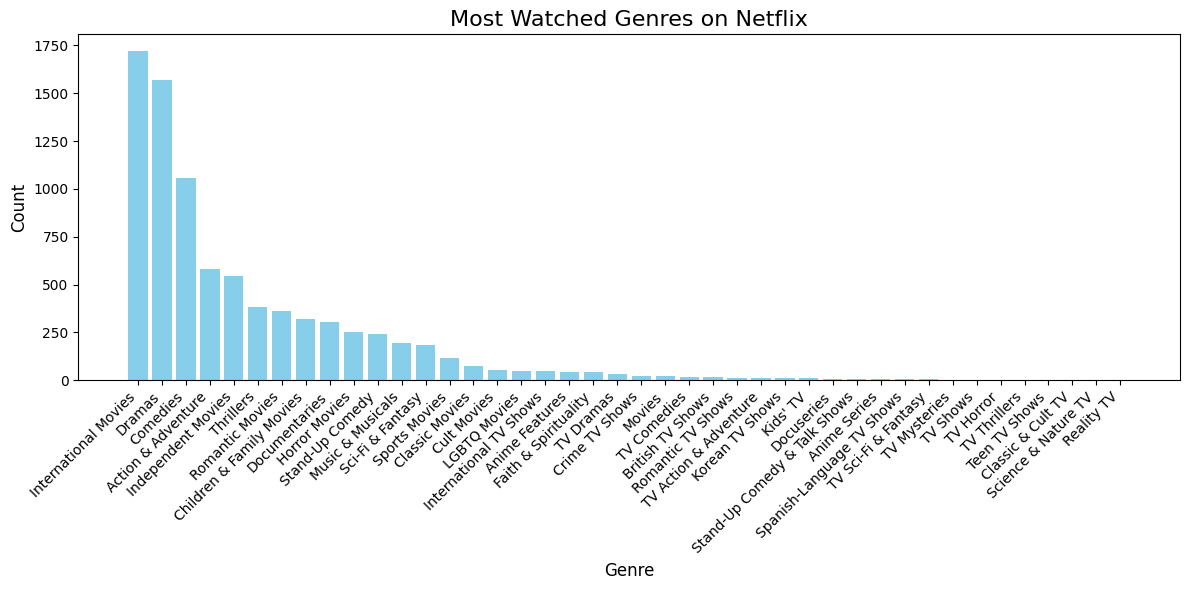

In [ ]:
#Plot most watched genres using matplotlib library alone
from collections import Counter

# Split the genres into individual entries and count their occurrences

genre_list = Netflix_shows_movies['listed_in'].str.split(', ').sum()
genre_counts = Counter(genre_list)

# Create a DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.title('Most Watched Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

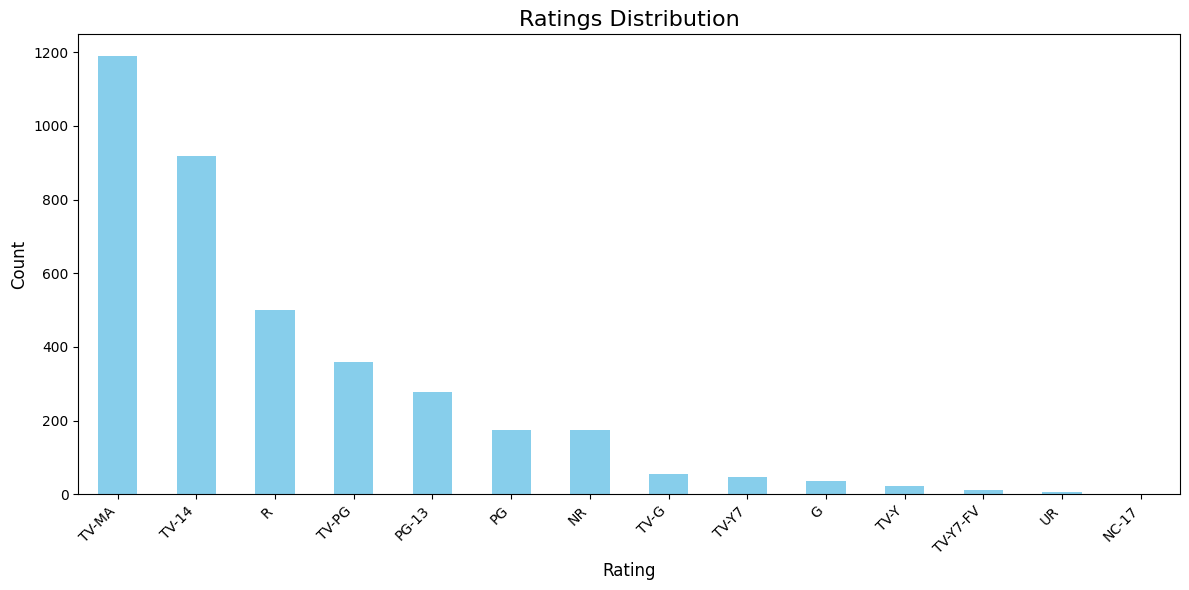

In [ ]:
# Plot the ratings distribution using matplotlib library alone
plt.figure(figsize=(12, 6))
Netflix_shows_movies['rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7668\3340749120.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


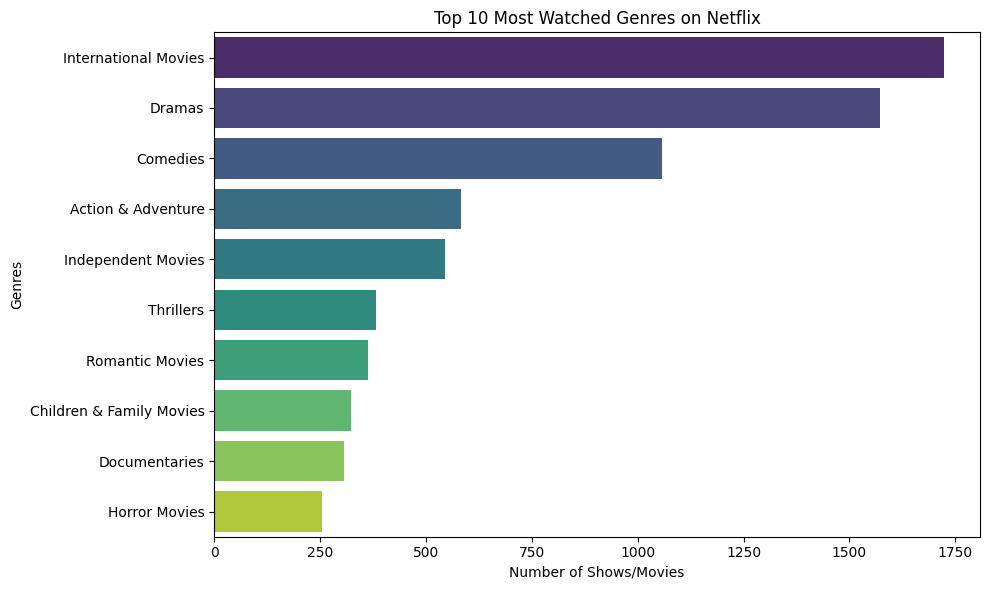

In [ ]:
#Plot most watched genres using matplotlib library and seaborn library

from collections import Counter

# Break down the genres
genre_series = Netflix_shows_movies['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_series for genre in sublist]

# Count genres
genre_counts = Counter(flat_genres)
top_10_genres = genre_counts.most_common(10)

# Prepare for plotting
genres, counts = zip(*top_10_genres)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7668\3910967299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Netflix_shows_movies, y='rating', order=Netflix_shows_movies['rating'].value_counts().index, palette='rocket')


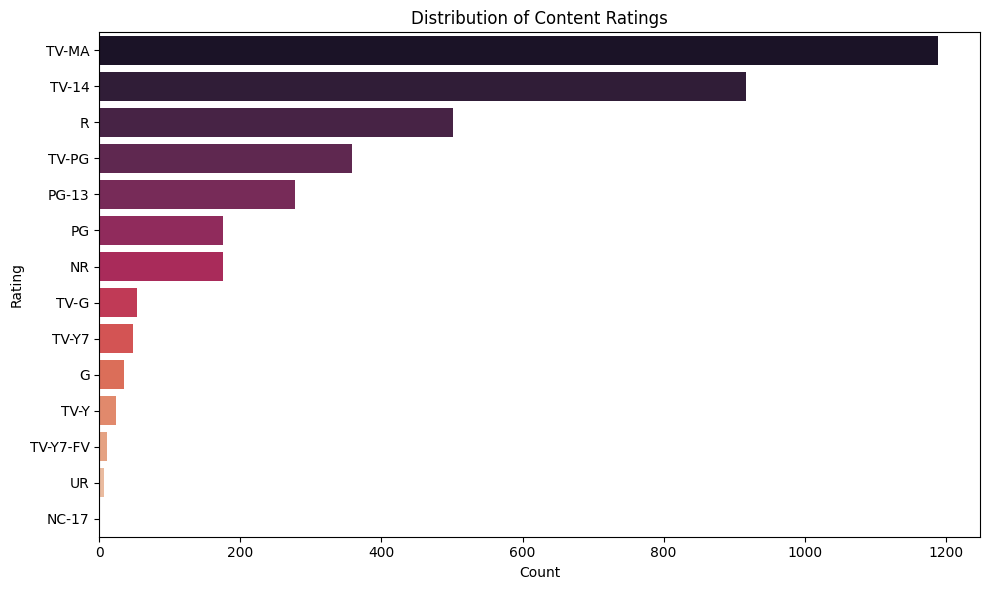

In [102]:
# Plot the ratings distribution using matplotlib library and seaborn library
try:
    plt.figure(figsize=(10,6))
    sns.countplot(data=Netflix_shows_movies, y='rating', order=Netflix_shows_movies['rating'].value_counts().index, palette='rocket')
    plt.title('Distribution of Content Ratings')
    plt.xlabel('Count')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred while plotting the ratings distribution: {e}")


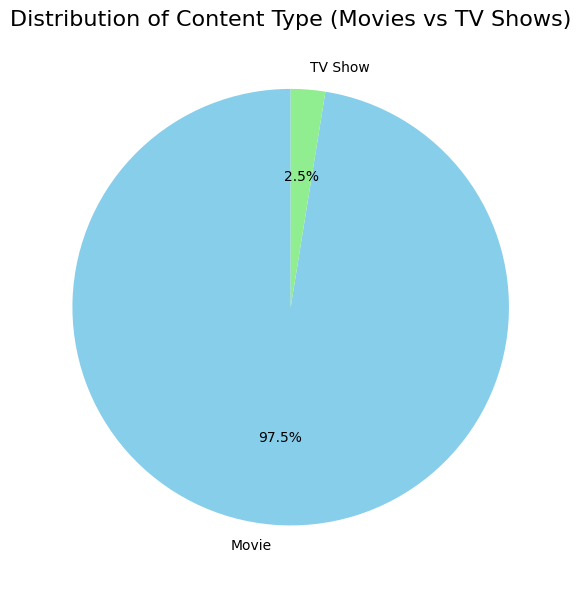

In [94]:
try:
    plt.figure(figsize=(6, 6))
    Netflix_shows_movies['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
    plt.title('Distribution of Content Type (Movies vs TV Shows)', fontsize=16)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred while plotting the pie chart: {e}")
